<a href="https://colab.research.google.com/github/dajebbar/AIPND/blob/main/Matplotlib_and_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
%matplotlib inline

In [108]:
pockemon = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AIPND/Matplotlib/data/pokemon.csv')
pockemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [109]:
pockemon.shape

(807, 14)

In [110]:
pockemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               807 non-null    int64  
 1   species          807 non-null    object 
 2   generation_id    807 non-null    int64  
 3   height           807 non-null    float64
 4   weight           807 non-null    float64
 5   base_experience  807 non-null    int64  
 6   type_1           807 non-null    object 
 7   type_2           405 non-null    object 
 8   hp               807 non-null    int64  
 9   attack           807 non-null    int64  
 10  defense          807 non-null    int64  
 11  speed            807 non-null    int64  
 12  special-attack   807 non-null    int64  
 13  special-defense  807 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 88.4+ KB


In [111]:
pockemon['species'] = pockemon.species.astype('category')
pockemon['type_1'] = pockemon.type_1.astype('category')
pockemon['type_2'] = pockemon.type_2.astype('category')

pockemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   id               807 non-null    int64   
 1   species          807 non-null    category
 2   generation_id    807 non-null    int64   
 3   height           807 non-null    float64 
 4   weight           807 non-null    float64 
 5   base_experience  807 non-null    int64   
 6   type_1           807 non-null    category
 7   type_2           405 non-null    category
 8   hp               807 non-null    int64   
 9   attack           807 non-null    int64   
 10  defense          807 non-null    int64   
 11  speed            807 non-null    int64   
 12  special-attack   807 non-null    int64   
 13  special-defense  807 non-null    int64   
dtypes: category(3), float64(2), int64(9)
memory usage: 120.5 KB


In [112]:
pockemon.species.nunique()

807

In [113]:
pockemon.type_1.unique()

['grass', 'fire', 'water', 'bug', 'normal', ..., 'ice', 'dragon', 'dark', 'steel', 'flying']
Length: 18
Categories (18, object): ['grass', 'fire', 'water', 'bug', ..., 'dragon', 'dark', 'steel', 'flying']

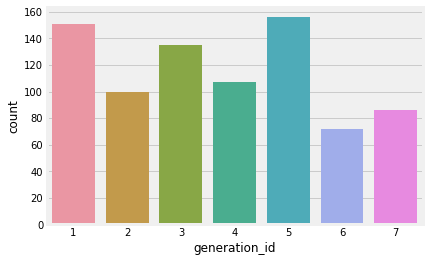

In [114]:
sns.countplot(data=pockemon, x='generation_id');

In [115]:
base_col = sns.color_palette()[0]

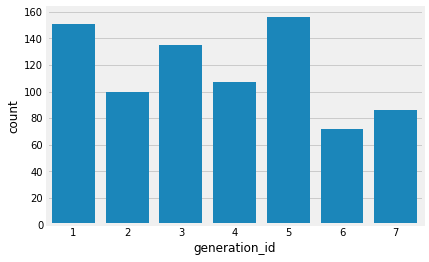

In [116]:
sns.countplot(data=pockemon, x='generation_id', color=base_col);

In [117]:
gen_order = pockemon['generation_id'].value_counts().index
gen_order

Int64Index([5, 1, 3, 4, 2, 7, 6], dtype='int64')

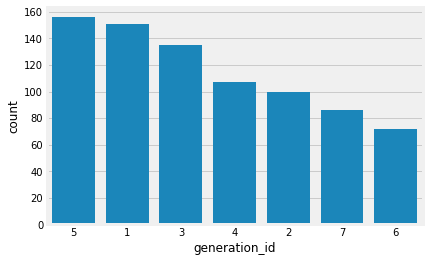

In [118]:
sns.countplot(data=pockemon,
              x='generation_id',
              color=base_col,
              order=gen_order);

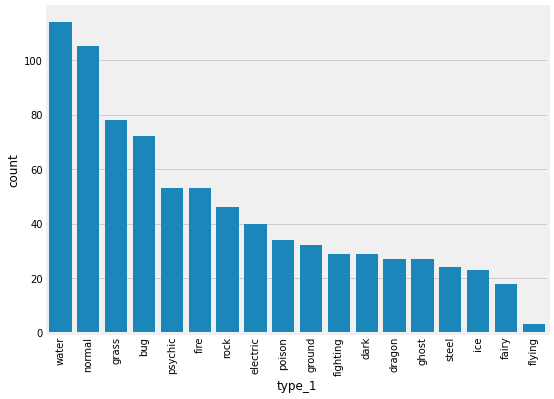

In [119]:
type_order = pockemon['type_1'].value_counts().index

plt.figure(figsize=(8,6))
plt.xticks(rotation=90)
sns.countplot(data=pockemon,
              x='type_1',
              color=base_col,
              order=type_order);


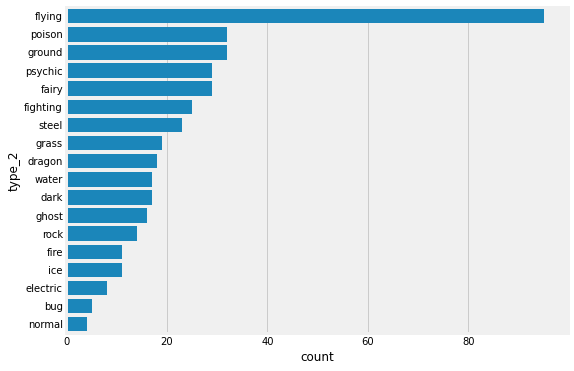

In [120]:
type_order2 = pockemon['type_2'].value_counts().index

plt.figure(figsize=(8,6))
sns.countplot(data=pockemon,
              y='type_2',
              color=base_col,
              order=type_order2);

# Absolute Vs Relative Frequency 

In [121]:
pkmn_types = pockemon.melt(id_vars=['id', 'species'],
                           value_vars=['type_1', 'type_2'],
                           var_name='type_level',
                           value_name='type').dropna()

pkmn_types

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
...,...,...,...,...
1607,801,magearna,type_2,fairy
1608,802,marshadow,type_2,ghost
1610,804,naganadel,type_2,dragon
1611,805,stakataka,type_2,steel


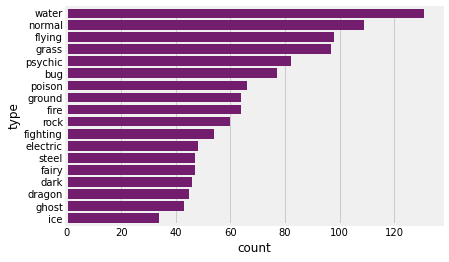

In [122]:
type_count = pkmn_types['type'].value_counts()
type_order = type_count.index
base_color = sns.color_palette()[5]
sns.countplot(data=pkmn_types, y='type', order=type_order, color=base_color);

In [123]:
n_pockemon = pockemon.shape[0]
max_type_cnt = type_count[0]
max_prop = max_type_cnt / n_pockemon
max_prop

0.1623296158612144

In [124]:
ticks_prop = np.arange(0, max_prop, 0.02)
ticks_prop

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16])

In [125]:
tick_names = [f"{v:0.2f}" for v in ticks_prop]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10', '0.12', '0.14', '0.16']

Text(0.5, 0, 'proportion')

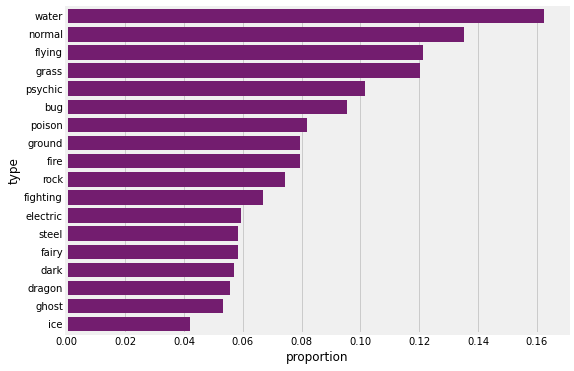

In [126]:
plt.figure(figsize=[8,6])
sns.countplot(data=pkmn_types, y='type', order=type_order, color=base_color)
plt.xticks(n_pockemon * ticks_prop, tick_names)
plt.xlabel('proportion')

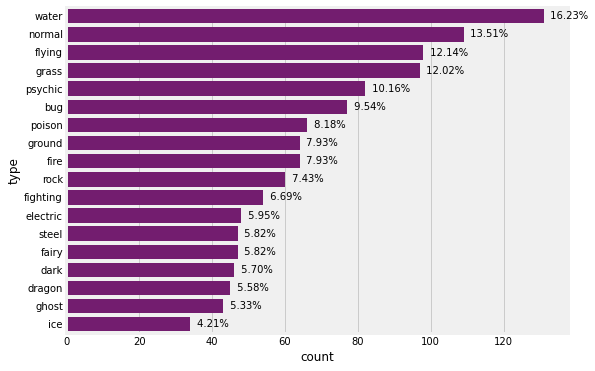

In [127]:
plt.figure(figsize=[8,6])
sns.countplot(data=pkmn_types, y='type', order=type_order, color=base_color)

for i in range(type_count.shape[0]):
  cnt = type_count[i]
  pct_string = f"{100 * cnt/n_pockemon: 0.2f}%"
  plt.text(cnt+1, i, pct_string, va='center')


# Counting Missing Data

In [128]:
pockemon.isna().sum()

id                   0
species              0
generation_id        0
height               0
weight               0
base_experience      0
type_1               0
type_2             402
hp                   0
attack               0
defense              0
speed                0
special-attack       0
special-defense      0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

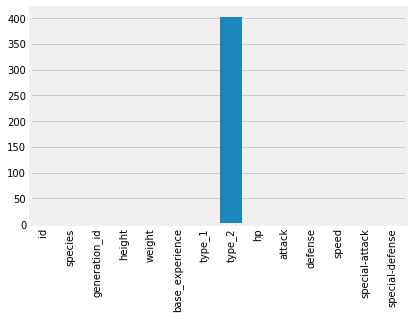

In [129]:
na_cnt = pockemon.isna().sum()

base_color = sns.color_palette()[0]

sns.barplot(na_cnt.index.values, na_cnt, color=base_color);
plt.xticks(rotation=90)

# Pie Charts

(-1.113611536756788,
 1.122668126501173,
 -1.1346305581062308,
 1.1016491051517303)

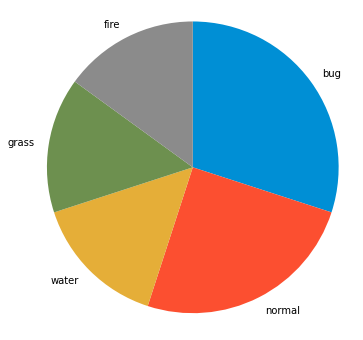

In [130]:
sorted_cnt = pkmn_types.loc[:, 'type'][:20].value_counts()
plt.figure(figsize=(8,6))
plt.pie(sorted_cnt, labels=sorted_cnt.index, startangle=90, counterclock=False);
plt.axis('square')

(-1.113611536756788,
 1.122668126501173,
 -1.1346305581062308,
 1.1016491051517303)

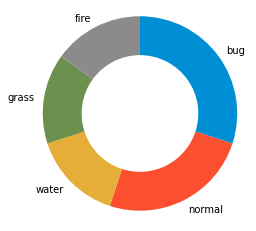

In [131]:
# donnut

plt.pie(sorted_cnt, labels=sorted_cnt.index, startangle=90,
        counterclock=False,
        wedgeprops={'width': 0.4});
plt.axis('square')

# Histograms

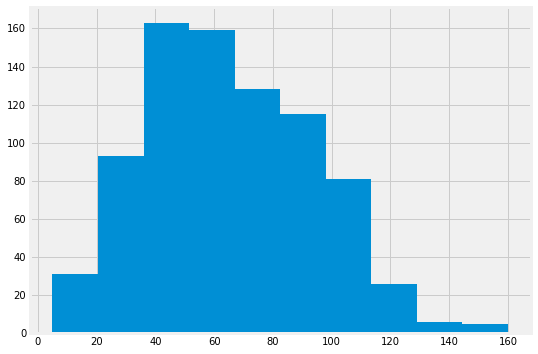

In [132]:
plt.figure(figsize=[8,6])
plt.hist(data=pockemon, x='speed');

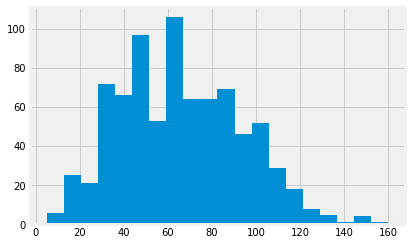

In [133]:
plt.hist(data=pockemon, x='speed', bins=20);

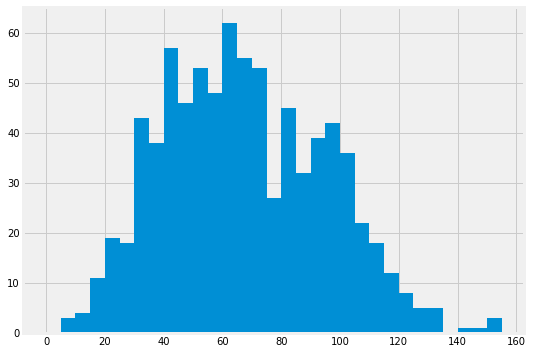

In [134]:
bins = np.arange(0, pockemon['speed'].max(), 5)
plt.figure(figsize=[8,6])
plt.hist(data=pockemon, x='speed', bins=bins);

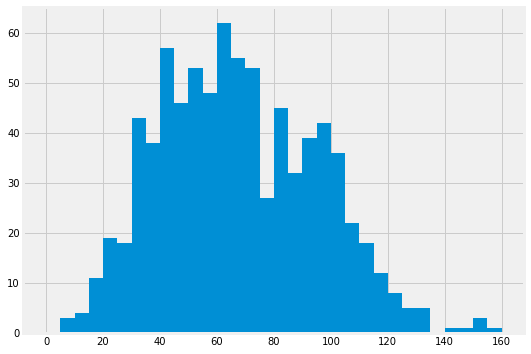

In [135]:
bins = np.arange(0, pockemon['speed'].max()+5, 5)
plt.figure(figsize=[8,6])
plt.hist(data=pockemon, x='speed', bins=bins);

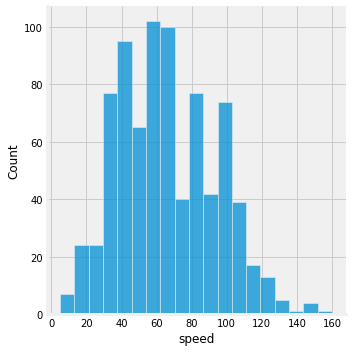

In [136]:
sns.displot(pockemon['speed']);

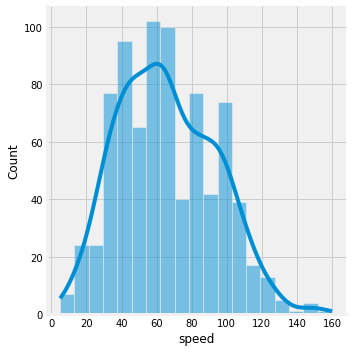

In [137]:
sns.displot(pockemon['speed'], kde=True);

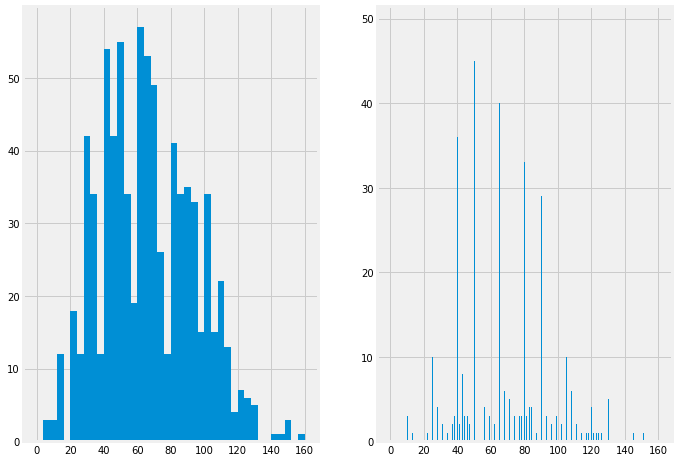

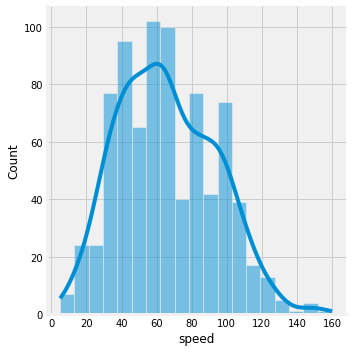

In [138]:
plt.figure(figsize=[16,8])

plt.subplot(1,3,1)
bins = np.arange(0, pockemon['speed'].max()+4, 4)
plt.hist(data=pockemon, x='speed', bins=bins);

plt.subplot(1, 3, 2)
bins = np.arange(0, pockemon['speed'].max()+1/4, 1/4)
plt.hist(data=pockemon, x='speed', bins=bins);

# plt.subplot(1,3,3)
sns.displot(data=pockemon, x='speed', kde=True);

# Figures, Axes, and Subplots

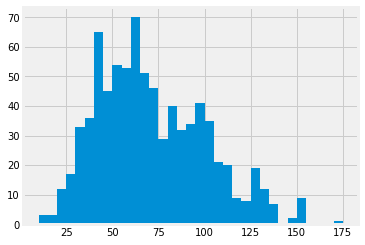

In [139]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])

bins = np.arange(pockemon['special-attack'].min(),
                 pockemon['special-attack'].max()+5, 5)

ax.hist(data=pockemon, x='special-attack', bins=bins);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

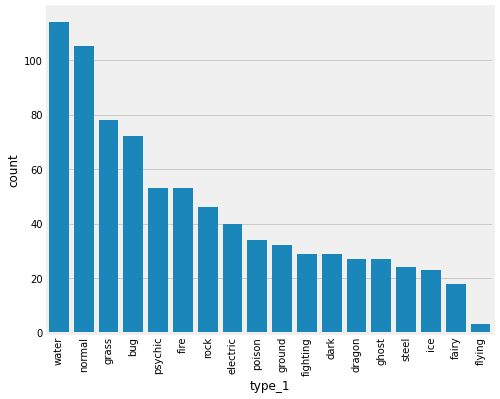

In [140]:
# ax with seaborn

fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([.125, .125, .775, .755])
order_type = pockemon['type_1'].value_counts().index
sns.countplot(data=pockemon, x='type_1', color=base_color, ax=ax, order=order_type);
plt.xticks(rotation=90)

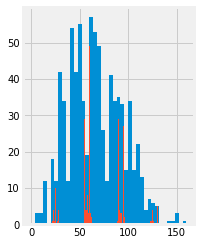

In [141]:
plt.subplot(1,2,1)
bins = np.arange(0, pockemon['speed'].max()+4, 4)
plt.hist(data=pockemon, x='speed', bins=bins);

# plt.subplot(1, 2, 2)
bins = np.arange(0, pockemon['speed'].max()+1/4, 1/4)
plt.hist(data=pockemon, x='speed', bins=bins);


# Choosing a Plot for Discrete Data


# Descriptive Stats Outliers And Axis Limits

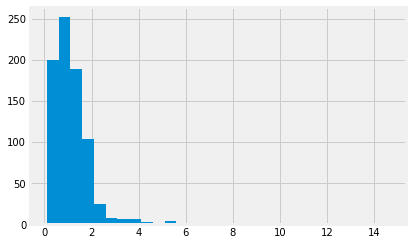

In [142]:
bins = np.arange(pockemon['height'].min(), pockemon['height'].max()+.5, .5)
plt.hist(data=pockemon, x='height', bins=bins);

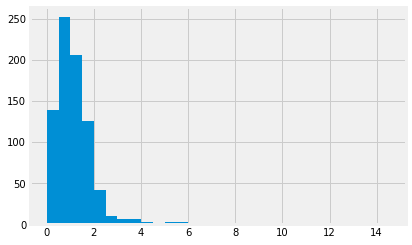

In [143]:
bins = np.arange(0, pockemon['height'].max()+.5, .5)
plt.hist(data=pockemon, x='height', bins=bins);

(0.0, 6.0)

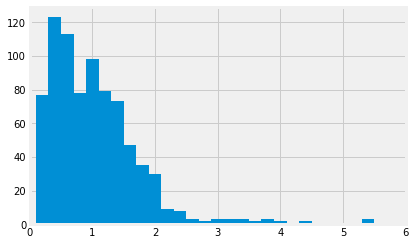

In [144]:
bins = np.arange(pockemon['height'].min(), pockemon['height'].max()+.2, .2)
plt.hist(data=pockemon, x='height', bins=bins);
plt.xlim((0, 6))

# Scales And Transformations

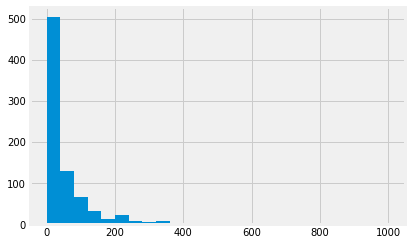

In [145]:
bins = np.arange(0, pockemon['weight'].max()+40, 40)
plt.hist(data=pockemon, x='weight', bins=bins);

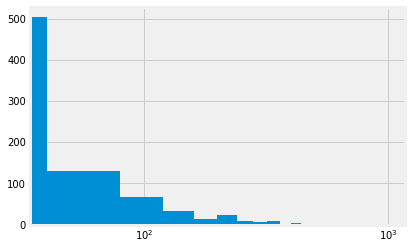

In [146]:
bins = np.arange(0, pockemon['weight'].max()+40, 40)
plt.hist(data=pockemon, x='weight', bins=bins);
plt.xscale('log')

In [147]:
pockemon['weight'].describe()

count    807.000000
mean      61.771128
std      111.519355
min        0.100000
25%        9.000000
50%       27.000000
75%       63.000000
max      999.900000
Name: weight, dtype: float64

In [148]:
np.log10(pockemon['weight']).describe()

count    807.000000
mean       1.364366
std        0.670968
min       -1.000000
25%        0.954243
50%        1.431364
75%        1.799341
max        2.999957
Name: weight, dtype: float64

([<matplotlib.axis.XTick at 0x7f06797c4710>,
 [Text(0, 0, '0.10'),
  Text(0, 0, '0.30'),
  Text(0, 0, '1.00'),
  Text(0, 0, '3.00'),
  Text(0, 0, '10.00'),
  Text(0, 0, '30.00'),
  Text(0, 0, '100.00'),
  Text(0, 0, '300.00'),
  Text(0, 0, '1000.00')])

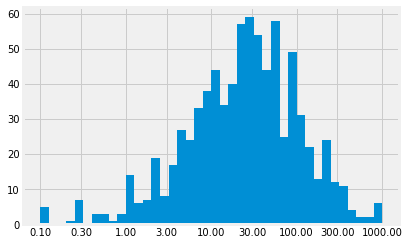

In [149]:
bins = 10 **np.arange(-1, 3 + 0.1, 0.1)
plt.hist(data=pockemon, x='weight', bins=bins);
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels = [f"{v:0.2f}" for v in ticks]
plt.xscale('log')
plt.xticks(ticks=ticks, labels=labels)

In [150]:
pockemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


([<matplotlib.axis.XTick at 0x7f067a10c2d0>,
 [Text(0, 0, '0.00'),
  Text(0, 0, '0.50'),
  Text(0, 0, '1.00'),
  Text(0, 0, '1.50'),
  Text(0, 0, '2.00'),
  Text(0, 0, '2.50')])

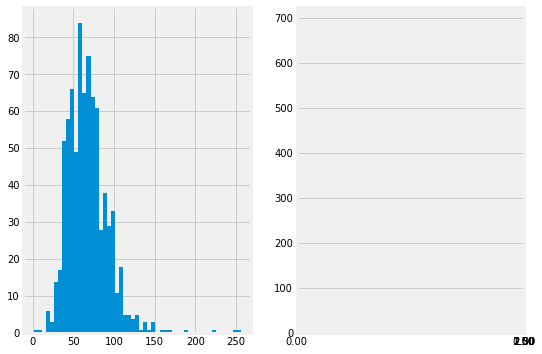

In [151]:
plt.figure(figsize=[8,6])

plt.subplot(1, 2, 1)
bins = np.arange(pockemon['hp'].min(), pockemon['hp'].max()+5, 5)
plt.hist(data=pockemon, x='hp', bins=bins);

plt.subplot(1, 2, 2)
bins = 10 **np.arange(0, 2.45 + 0.5, 0.5)
ticks = [0, 0.5, 1, 1.5, 2, 2.5]
labels = [f"{v:0.2f}" for v in ticks]
plt.hist(data=pockemon, x='hp', bins=bins);
plt.xscale('log')
plt.xticks(ticks, labels)

In [152]:
np.log10(pockemon['attack']).describe()

count    807.000000
mean       1.842731
std        0.197323
min        0.698970
25%        1.740363
50%        1.875061
75%        1.977724
max        2.257679
Name: attack, dtype: float64

In [153]:
pockemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


---
# Matplotlib and Seaborn Part 2
---

# Scatterplots and Correlation

In [155]:
fuel_econ = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AIPND/Matplotlib/data/fuel_econ.csv')

print(fuel_econ.shape)

fuel_econ.head()

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

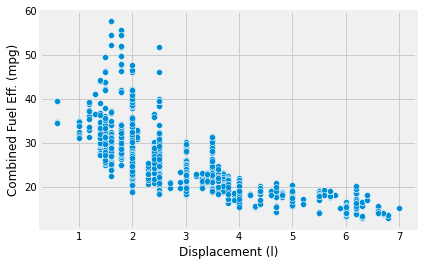

In [159]:
sns.scatterplot(data=fuel_econ, x='displ', y='comb');
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')

Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

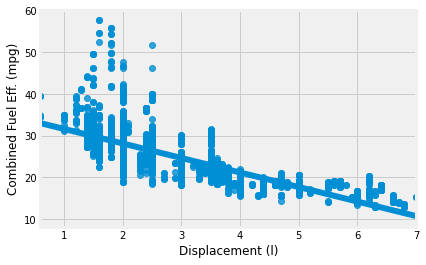

In [161]:
sns.regplot(data=fuel_econ, x='displ', y='comb');
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')

In [162]:
def log_trans(x, inverse=False):
  if not inverse:
    return np.log10(x)
  else:
    return np.power(10, x)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


([<matplotlib.axis.YTick at 0x7f067907d810>,
 [Text(0, 0, '10'),
  Text(0, 0, '20'),
  Text(0, 0, '50'),
  Text(0, 0, '100'),
  Text(0, 0, '200'),
  Text(0, 0, '500')])

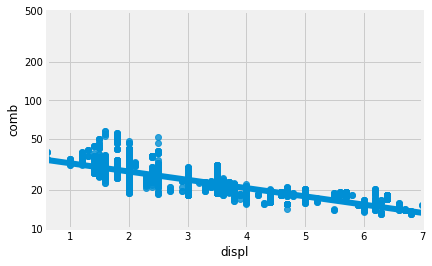

In [163]:
sns.regplot(fuel_econ['displ'], fuel_econ['comb'].apply(log_trans));
tick_locs = [10, 20, 50, 100, 200, 500]
plt.yticks(log_trans(tick_locs), tick_locs)

# Overplotting, Transparency, and Jitter

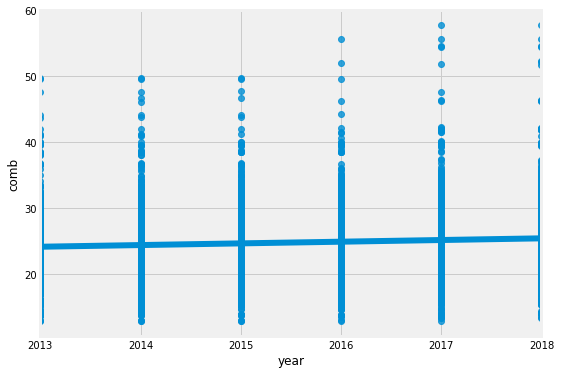

In [165]:
plt.figure(figsize=[8,6])
sns.regplot(data=fuel_econ, x='year', y='comb');

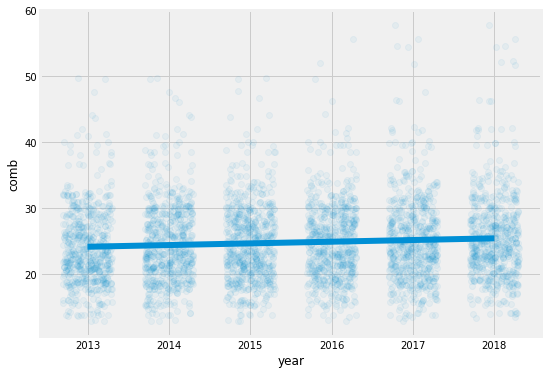

In [168]:
plt.figure(figsize=[8,6])
sns.regplot(data=fuel_econ, x='year', y='comb', x_jitter=0.3, scatter_kws={'alpha': 1/20});

Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

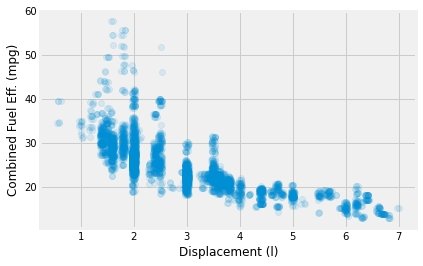

In [170]:
sns.regplot(data=fuel_econ, x='displ', y='comb', x_jitter=.04, scatter_kws={'alpha':1/10}, fit_reg=False);
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')

Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

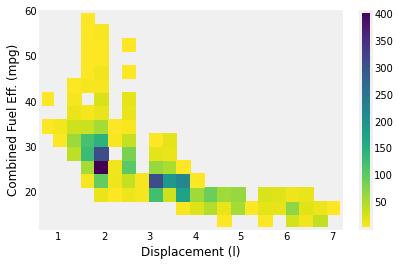

In [174]:
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 60+3, 3)

plt.hist2d(data=fuel_econ, x='displ', y='comb', cmin=0.5,
           cmap='viridis_r', bins=[bins_x, bins_y]);
plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')

In [173]:
fuel_econ[['displ', 'comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


In [175]:
fuel_econ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         3929 non-null   int64  
 1   make       3929 non-null   object 
 2   model      3929 non-null   object 
 3   year       3929 non-null   int64  
 4   VClass     3929 non-null   object 
 5   drive      3929 non-null   object 
 6   trans      3929 non-null   object 
 7   fuelType   3929 non-null   object 
 8   cylinders  3929 non-null   int64  
 9   displ      3929 non-null   float64
 10  pv2        3929 non-null   int64  
 11  pv4        3929 non-null   int64  
 12  city       3929 non-null   float64
 13  UCity      3929 non-null   float64
 14  highway    3929 non-null   float64
 15  UHighway   3929 non-null   float64
 16  comb       3929 non-null   float64
 17  co2        3929 non-null   int64  
 18  feScore    3929 non-null   int64  
 19  ghgScore   3929 non-null   int64  
dtypes: float

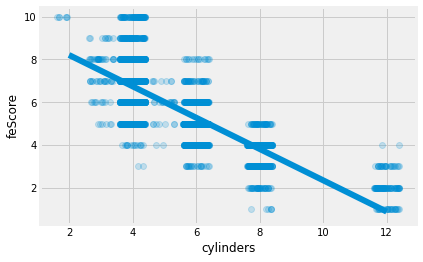

In [177]:
# cylinders, feScore

sns.regplot(data=fuel_econ, x='cylinders', y='feScore', x_jitter=0.4, scatter_kws={'alpha': 1/5});

Text(0, 0.5, 'feScore')

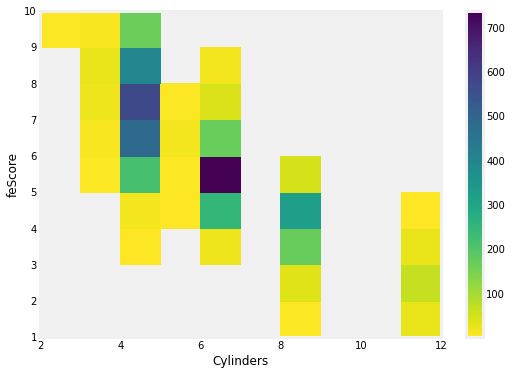

In [182]:
bins_x = np.arange(2, 12+1, 1)
bins_y = np.arange(1, 10+1, 1)

plt.figure(figsize=(8,6))
plt.hist2d(data=fuel_econ, x='cylinders', y='feScore', cmin=0.5,
           bins=[bins_x, bins_y], cmap = 'viridis_r');

plt.colorbar()
plt.xlabel('Cylinders')
plt.ylabel('feScore')

In [179]:
fuel_econ[['cylinders', 'feScore']].describe()

,cylinders,feScore
count,3929.000000,3929.000000
mean,5.468313,5.668872
std,1.878319,1.755860
min,2.000000,1.000000
25%,4.000000,5.000000
50%,5.000000,5.000000
75%,6.000000,7.000000
max,12.000000,10.000000


# Violin Plots

In [184]:
# when we have qualitative variable against quantitative variable

# fuel_econ.info()
fuel_econ['VClass'] = fuel_econ.VClass.astype('category')

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

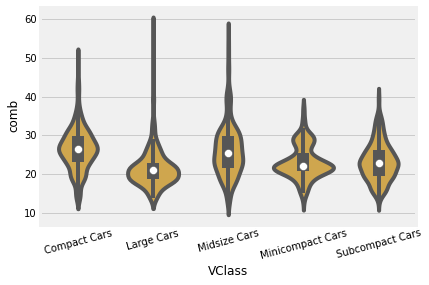

In [187]:
base_color = sns.color_palette()[2]
sns.violinplot(data=fuel_econ, x='VClass', y='comb',
               color= base_color);
plt.xticks(rotation=15)


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

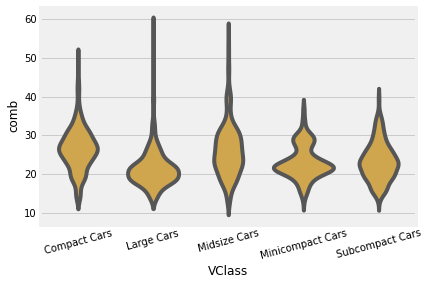

In [188]:
sns.violinplot(data=fuel_econ, x='VClass', y='comb',
               color= base_color, inner=None);
plt.xticks(rotation=15)